In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import seaborn as sns; sns.set(style="ticks", color_codes="pastel")
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
import time
from sklearn import metrics
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


def stdscaler(df):
    scaler = StandardScaler()
    scaler.fit(df)
    scX_df = scaler.transform(df)
    df=pd.DataFrame(scX_df, index =df.index,columns =df.columns  )
    return df


import time

samplechoice = "SMOTE"
"""
if samplechoice == "SMOTE":
    smt = SMOTE()
    train_data , train_y = smt.fit_sample(train_data , train_y)
elif samplechoice == "NearMiss":
    nr = NearMiss()
    train_data , train_y = nr.fit_sample(train_data , train_y)

    
"""


def kfoldtest(kfoldn,model,Xtrain_df,ytrain_df):
    kf=StratifiedKFold(n_splits=kfoldn)
    accu=[]
    auc=[]
    f1 =[]
    aab =[]
    dcd = []
    tim = []
    kf.get_n_splits(Xtrain_df,ytrain_df)
    
    for train_index, test_index in kf.split(Xtrain_df,ytrain_df):
        #print("TRAIN:", len(train_index), "TEST:", len(test_index))
        t1 =time.time()
        X_train, X_test = Xtrain_df.iloc[train_index], Xtrain_df.iloc[test_index]
        y_train, y_test = ytrain_df.iloc[train_index], ytrain_df.iloc[test_index]
        
        
        if samplechoice == "SMOTE":
            smt = SMOTE()
            X_train,  y_train = smt.fit_sample(X_train , y_train)
        elif samplechoice == "NearMiss":
            nr = NearMiss()
            X_train,  y_train = nr.fit_sample(X_train , y_train)

    
        model.fit(X_train,y_train)
        try:
            accu.append(model.score(X_test,y_test))
        except:
            print("This model have no build-in score.")
            
        auc.append(roc_auc_score(y_test,model.predict(X_test)))
        f1.append(f1_score(y_test, model.predict(X_test).astype(int),average='binary'))
        tim.append(time.time()-t1)
        cm1=confusion_matrix(test_y, clf.predict(test_data),labels = [1,0])
        sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        aab.append(sensitivity1)

        specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        dcd.append(specificity1)
    return accu,auc,f1,aab,dcd,tim

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
file_name = 'model1.csv'
data =pd.read_csv(file_name,index_col = 0)
print(data.columns)


Index(['paystate', 'lastpay', 'billpay', 'billlim', 'paylim', 'billchangelim0',
       'paychangelim0', 'billchangelim1', 'paychangelim1', 'billchangelim2',
       'paychangelim2', 'billchangelim3', 'paychangelim3', 'billchangelim4',
       'paychangelim4', 'paymin', 'payful', 'inactive', 'ageclass_20s',
       'ageclass_30s', 'ageclass_40s', 'ageclass_50s', 'ageclass_60s',
       'ageclass_70s', 'sex_1', 'sex_2', 'education_0', 'education_1',
       'education_2', 'education_3', 'education_4', 'education_5',
       'education_6', 'marriage_0', 'marriage_1', 'marriage_2', 'marriage_3',
       'default.payment.next.month'],
      dtype='object')


In [37]:
v1 = data[data["default.payment.next.month"]==1].copy()
v0 = data[data["default.payment.next.month"]==0].copy()
v1.rename(columns={"default.payment.next.month": "default"},inplace = True)
v0.rename(columns={"default.payment.next.month": "default"},inplace = True)
y1 = v1["default"].copy()
x1 = v1.copy()
del x1["default"]
y0 = v0["default"].copy()
x0 = v0.copy()
del x0["default"]

tr1,te1,try1,tey1 = train_test_split(
    x1, y1, test_size=0.20, random_state=42)
tr2,te2,try2,tey2 = train_test_split(
    x0, y0, test_size=0.20, random_state=42)
####
#tr2=tr2.sample(len(tr1.index))

#try2 = try2.loc[tr2.index].copy()
####


train_data=pd.concat([tr1,tr2],axis=0)

train_y = pd.concat([try1,try2],axis=0)
test_data=pd.concat([te1,te2],axis=0)

test_y = pd.concat([tey1,tey2],axis=0)


train_data = stdscaler(train_data )
test_data = stdscaler(test_data )


In [30]:
"""
pca =PCA(n_components=.9).fit(train_data)
train_data = pd.DataFrame(pca.transform(train_data),index = train_data.index)   

test_data= pd.DataFrame(pca.transform(test_data),index = test_data.index)  
"""

'\npca =PCA(n_components=.9).fit(train_data)\ntrain_data = pd.DataFrame(pca.transform(train_data),index = train_data.index)   \n\ntest_data= pd.DataFrame(pca.transform(test_data),index = test_data.index)  \n'

In [31]:
"""
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(train_data, train_y) 
model = SelectFromModel(clf, prefit=True)
train_data= pd.DataFrame(model.transform(train_data),index=train_data)
test_data= pd.DataFrame(model.transform(test_data),index=test_data)
"""

'\nfrom sklearn.ensemble import ExtraTreesClassifier\n\nfrom sklearn.feature_selection import SelectFromModel\nclf = ExtraTreesClassifier(n_estimators=50)\nclf = clf.fit(train_data, train_y) \nmodel = SelectFromModel(clf, prefit=True)\ntrain_data= pd.DataFrame(model.transform(train_data),index=train_data)\ntest_data= pd.DataFrame(model.transform(test_data),index=test_data)\n'

In [32]:
"""from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel


lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(train_data, train_y)
model = SelectFromModel(lsvc, prefit=True)
train_data= pd.DataFrame(model.transform(train_data),index=train_data)
test_data= pd.DataFrame(model.transform(test_data),index=test_data)
"""

'from sklearn.svm import LinearSVC\nfrom sklearn.datasets import load_iris\nfrom sklearn.feature_selection import SelectFromModel\n\n\nlsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(train_data, train_y)\nmodel = SelectFromModel(lsvc, prefit=True)\ntrain_data= pd.DataFrame(model.transform(train_data),index=train_data)\ntest_data= pd.DataFrame(model.transform(test_data),index=test_data)\n'

In [34]:
abs_weights

array([[0.44030855, 0.37699831, 0.03036041, 0.30214927, 0.22487297,
        0.04532094, 0.06715589, 0.01424038, 0.10547078, 0.00522355,
        0.06378645, 0.0175202 , 0.01525508, 0.04311378, 0.04817889,
        0.24057814, 0.03014838, 0.09493738, 0.035646  , 0.04219859,
        0.00858725, 0.00455641, 0.00964738, 0.00766081, 0.02869893,
        0.02869893, 0.12167669, 0.04296143, 0.04013522, 0.03306852,
        0.02440613, 0.08624533, 0.01655434, 0.09629857, 0.04336707,
        0.03640395, 0.00632911]])

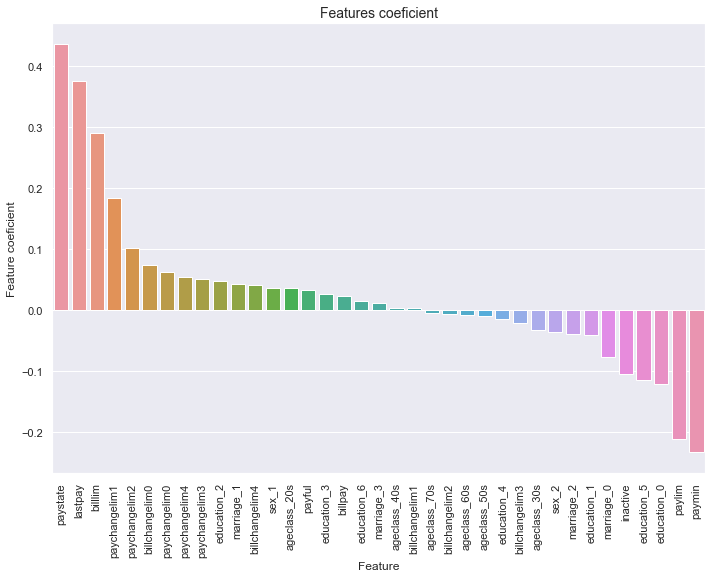

In [41]:
result=[]

clf=LogisticRegression(tol=0.01, C=0.1,solver='lbfgs', max_iter=10000,)
accu,auc,f1,aab,dcd,tim =kfoldtest(5,clf,train_data,train_y)
result.append(pd.DataFrame([["LogisticRegression",np.average(accu),np.average(auc),
                       np.average(f1),np.average(aab),np.average(dcd),np.average(tim)]],
                     columns=["model names",'CVaccuracy','CVaucroc','CVF1',"CVsensitivity",'CVspecificity','CVtime(s)']))


weights = clf.coef_
abs_weights = weights
tmp = pd.DataFrame({'Feature': train_data.columns, 'Feature coeficient': abs_weights[0]})
tmp = tmp.sort_values(by='Feature coeficient',ascending=False)
plt.figure(figsize = (11.7,8.27))
plt.title('Features coeficient',fontsize=14)
s = sns.barplot(x='Feature',y='Feature coeficient',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   


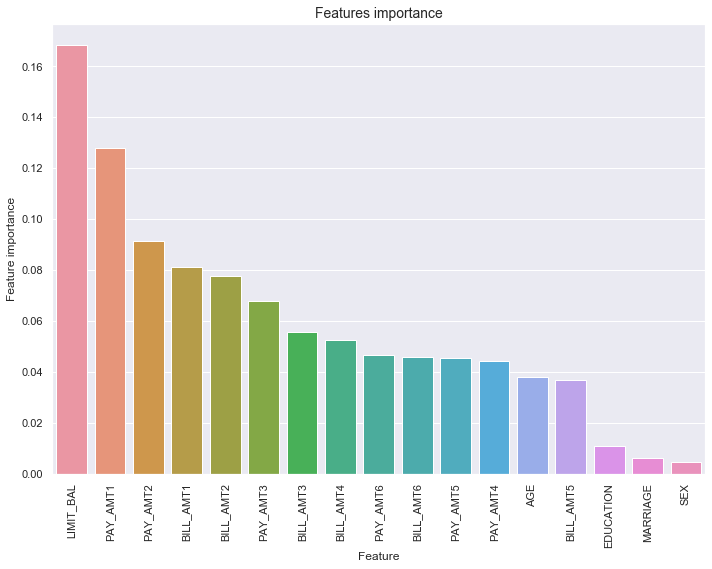

In [25]:
clf = tree.DecisionTreeClassifier(max_depth=10,class_weight="balanced",random_state=0)
accu,auc,f1,aab,dcd,tim =kfoldtest(5,clf,train_data,train_y)
result.append(pd.DataFrame([["DecisionTree",np.average(accu),np.average(auc),
                       np.average(f1),np.average(aab),np.average(dcd),np.average(tim)]],
                     columns=["model names",'CVaccuracy','CVaucroc','CVF1',"CVsensitivity",'CVspecificity','CVtime(s)']))


print()
tmp = pd.DataFrame({'Feature': train_data.columns, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (11.7,8.27))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

In [11]:
clf = GaussianNB(priors=None, var_smoothing=1e-09)
accu,auc,f1,aab,dcd,tim =kfoldtest(5,clf,train_data,train_y)
result.append(pd.DataFrame([["Naive bayes",np.average(accu),np.average(auc),
                       np.average(f1),np.average(aab),np.average(dcd),np.average(tim)]],
                     columns=["model names",'CVaccuracy','CVaucroc','CVF1',"CVsensitivity",'CVspecificity','CVtime(s)']))


tmp = pd.DataFrame({'Feature': train_data.columns, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (11.7,8.27))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

AttributeError: 'GaussianNB' object has no attribute 'feature_importances_'

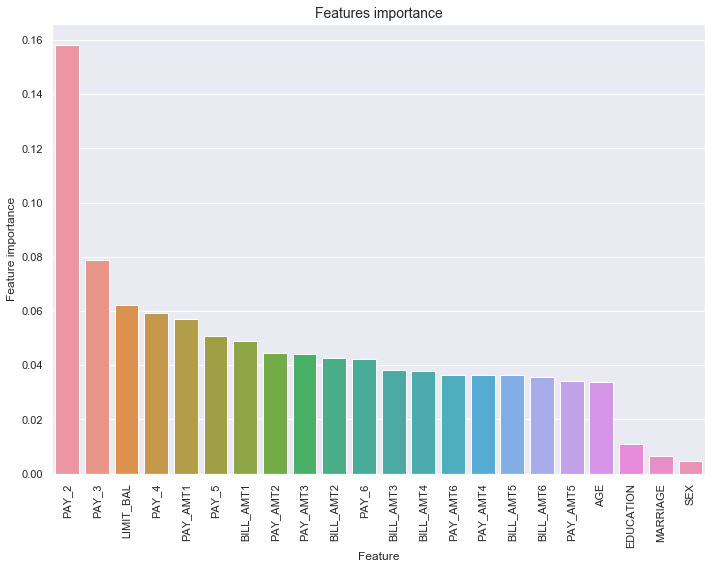

In [18]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

accu,auc,f1,aab,dcd,tim=kfoldtest(5,clf,train_data,train_y)
result.append(pd.DataFrame([["RandomForest",np.average(accu),np.average(auc),
                       np.average(f1),np.average(aab),np.average(dcd),np.average(tim)]],
                     columns=["model names",'CVaccuracy','CVaucroc','CVF1',"CVsensitivity",'CVspecificity','CVtime(s)']))
tmp = pd.DataFrame({'Feature': train_data.columns, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (11.7,8.27))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   


In [ ]:
clf=MLPClassifier(activation='tanh', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=3000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

accu,auc,f1,aab,dcd,tim =kfoldtest(5,clf,train_data,train_y)
result.append(pd.DataFrame([["MLP",np.average(accu),np.average(auc),
                       np.average(f1),np.average(aab),np.average(dcd),np.average(tim)]],
                     columns=["model names",'CVaccuracy','CVaucroc','CVF1',"CVsensitivity",'CVspecificity','CVtime(s)']))



/Users/untitledchinkengame/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
clf = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                                                         random_state=0,
                                                         splitter='best'),
                   learning_rate=1.0, n_estimators=20, random_state=None)

accu,auc,f1,aab,dcd,tim =kfoldtest(5,clf,train_data,train_y)
result.append(pd.DataFrame([["AdaboostDecisionTree",np.average(accu),np.average(auc),
                       np.average(f1),np.average(aab),np.average(dcd),np.average(tim)]],
                     columns=["model names",'CVaccuracy','CVaucroc','CVF1',"CVsensitivity",'CVspecificity','CVtime(s)']))

In [ ]:
clf= GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.1, min_samples_split=0.1,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
accu,auc,f1,aab,dcd ,tim=kfoldtest(5,clf,train_data,train_y)
result.append(pd.DataFrame([["GradientBoosting",np.average(accu),np.average(auc),
                       np.average(f1),np.average(aab),np.average(dcd),np.average(tim)]],
                     columns=["model names",'CVaccuracy','CVaucroc','CVF1',"CVsensitivity",'CVspecificity','CVtime(s)']))


In [26]:
result= pd.concat(result,axis=0)
result.to_csv('newmodel_{}sampling+svcselection.csv'.format(str(samplechoice)))

In [27]:
result


,model names,CVaccuracy,CVaucroc,CVF1,CVsensitivity,CVspecificity,CVtime(s)
0,LogisticRegression,0.778782,0.499973,0.00000,0.00000,1.000000,0.046707
0,DecisionTree,0.677777,0.638487,0.43788,0.30753,0.816221,0.159709
